In [1]:
# Import all the libraries needed 

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from pylab import *
from xclim.core.calendar import percentile_doy
from xclim.indices import tx10p


In [2]:
data = xr.open_dataset('/home/posiden/Documents/Datasets/era5/india.1960.1990.nc')


In [3]:
print(data)

<xarray.Dataset>
Dimensions:    (time: 10957, bnds: 2, longitude: 161, latitude: 141)
Coordinates:
  * time       (time) datetime64[ns] 1961-01-01T11:00:00 ... 1990-12-31T11:00:00
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 5.75 5.5 5.25 5.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Aug 10 10:42:11 2023: cdo sellonlatbox,60,100,5,40 land...
    frequency:    day
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...


### Climate Index Calculations 

In [4]:
from xclim.core.calendar import percentile_doy
from xclim.indices import tx10p

data = data.rename_vars({"t2m": "tasmax"})  # Renaming 't2m' to 'tasmax'

# Calculate the 10th percentile for each day of the year with a 5-day window
tasmax_per = percentile_doy(data['tasmax'], per=10, window=5).sel(percentiles=10)

# Calculate the tx10p index (number of days with tasmax below the 10th percentile)
cold_days = tx10p(data['tasmax'], tasmax_per)

# saving the file for easy visualisation
cold_days.to_netcdf('tx10p_index.nc')


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

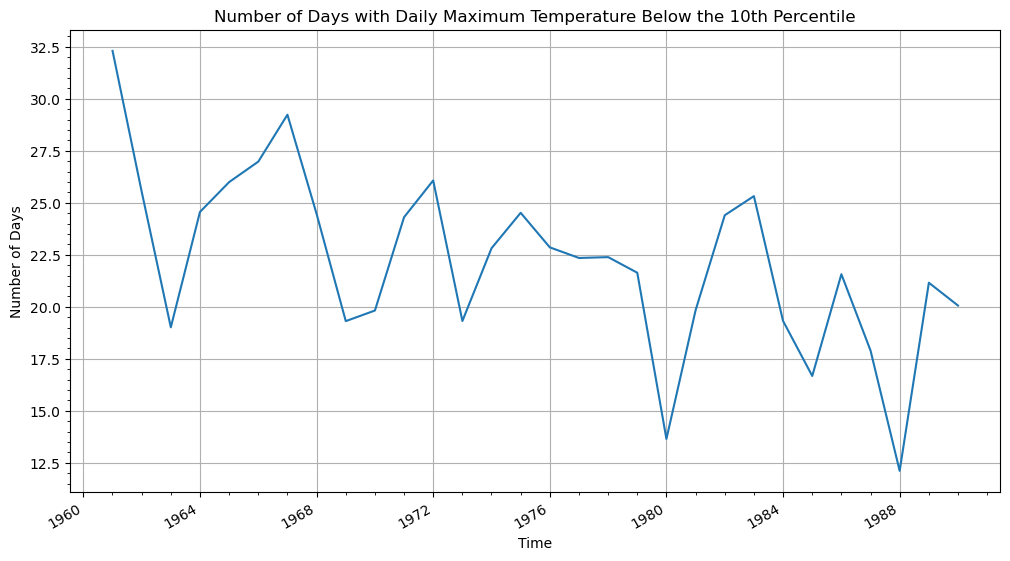

In [5]:
import matplotlib.pyplot as plt


cold_days_mean = cold_days.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Plotting the time series
plt.figure(figsize=(12, 6))
cold_days_mean.plot()
plt.title('Number of Days with Daily Maximum Temperature Below the 10th Percentile')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.grid(True)
plt.minorticks_on()
plt.show()


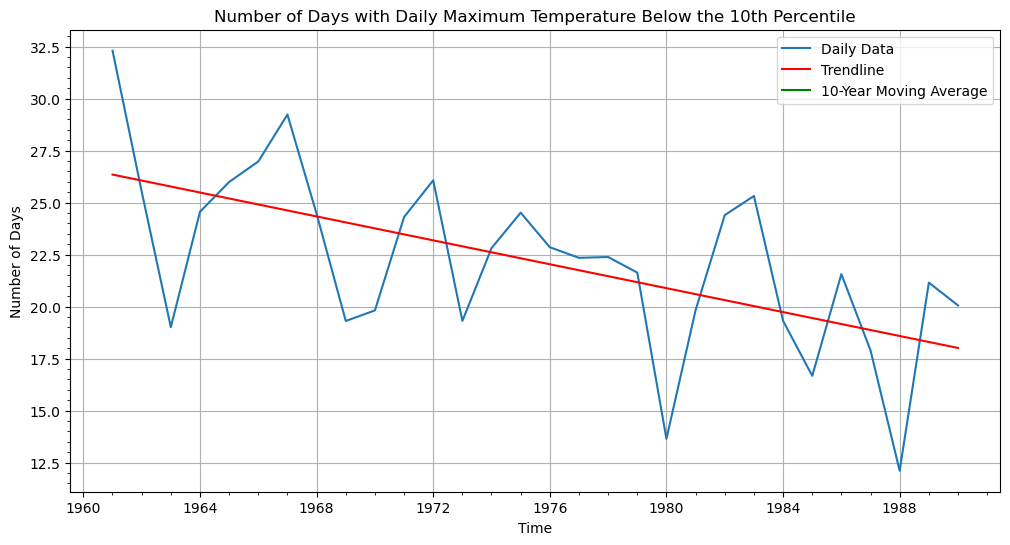

In [6]:
import numpy as np
import pandas as pd

cold_days_mean = cold_days.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Convert to a pandas Series for easier manipulation
cold_days_series = cold_days_mean.to_series()

# Calculate a linear trendline
slope, intercept = np.polyfit(cold_days_series.index.year, cold_days_series.values, 1)
trendline = slope * cold_days_series.index.year + intercept

# Calculate a 10-year moving average
moving_average = cold_days_series.rolling(window=10*365, center=True).mean()  

# Plotting the time series, trendline, and moving average
plt.figure(figsize=(12, 6))
plt.plot(cold_days_series.index, cold_days_series.values, label='Daily Data')
plt.plot(cold_days_series.index, trendline, label='Trendline', color='red')
plt.plot(moving_average.index, moving_average.values, label='10-Year Moving Average', color='green')
plt.title('Number of Days with Daily Maximum Temperature Below the 10th Percentile')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.show()


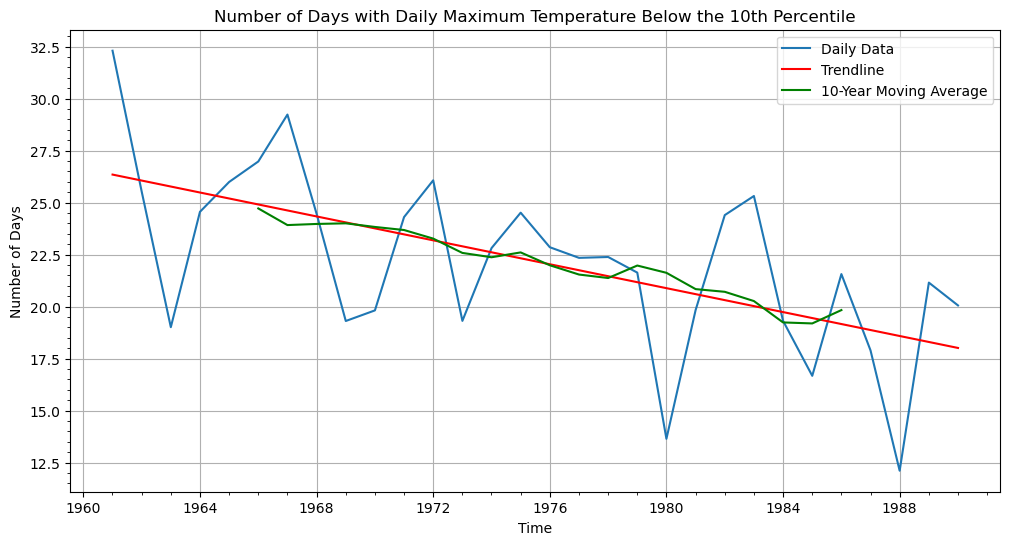

In [7]:
# Resample to annual data by taking the mean of each year
annual_data = cold_days_series.resample('AS').mean()

# Calculate a 10-year moving average of the annual data
moving_average = annual_data.rolling(window=10, center=True).mean()

# Plotting the time series, trendline, and moving average
plt.figure(figsize=(12, 6))
plt.plot(cold_days_series.index, cold_days_series.values, label='Daily Data')
plt.plot(cold_days_series.index, trendline, label='Trendline', color='red')
plt.plot(moving_average.index, moving_average.values, label='10-Year Moving Average', color='green')
plt.title('Number of Days with Daily Maximum Temperature Below the 10th Percentile')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.show()


In [ ]:
from xclim.core.calendar import percentile_doy
from xclim.indices import tx90p


tasmax_per_90 = percentile_doy(data['t2m'], per=90, window=5).sel(percentiles=90)
hot_days = tx90p(data['t2m'], tasmax_per_90)


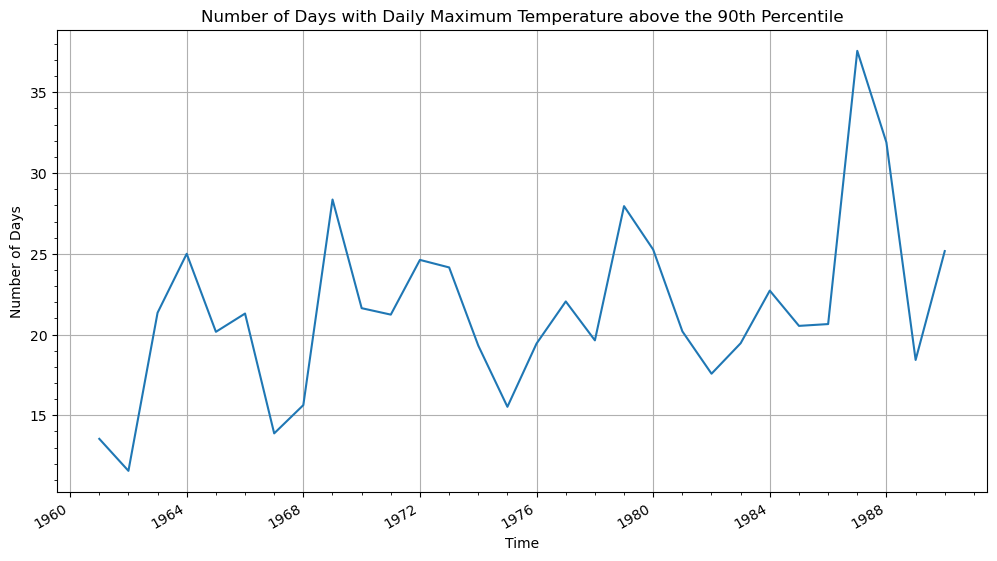

In [ ]:
hot_days_mean = hot_days.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Plotting the time series
plt.figure(figsize=(12, 6))
hot_days_mean.plot()
plt.title('Number of Days with Daily Maximum Temperature above the 90th Percentile')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.grid(True)
plt.minorticks_on()
plt.show()


In [ ]:
from xclim.indices import tn10p


tasmin_per_10 = percentile_doy(data['t2m'], per=10, window=5).sel(percentiles=10)
cold_nights = tn10p(data['t2m'], tasmin_per_10)


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

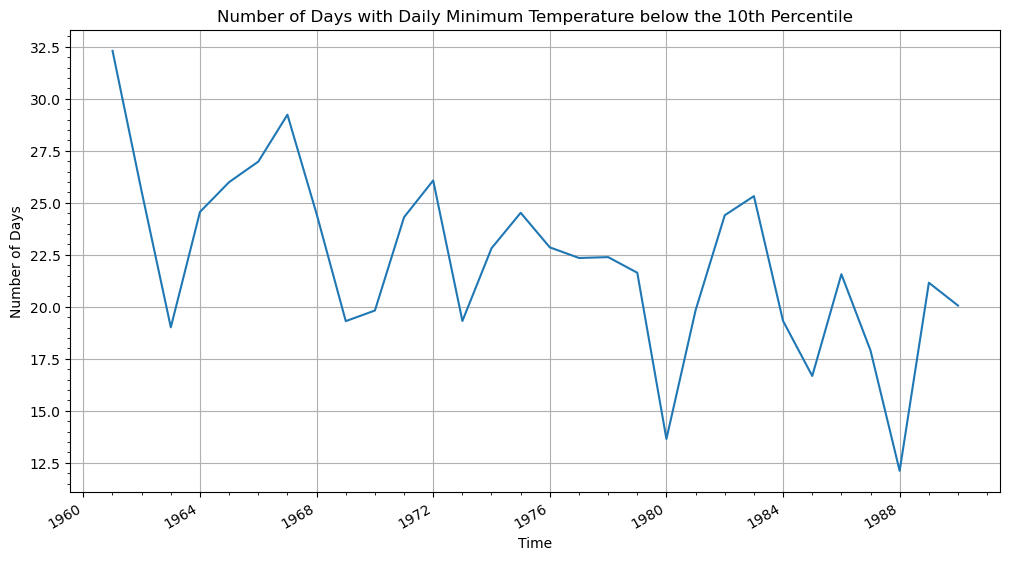

In [ ]:
cold_nights_mean = cold_nights.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Plotting the time series
plt.figure(figsize=(12, 6))
cold_nights_mean.plot()
plt.title('Number of Days with Daily Minimum Temperature below the 10th Percentile')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.grid(True)
plt.minorticks_on()
plt.show()


In [ ]:
from xclim.indices import tn90p


tasmin_per_90 = percentile_doy(data['t2m'], per=90, window=5).sel(percentiles=90)
warm_nights = tn90p(data['t2m'], tasmin_per_90)


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

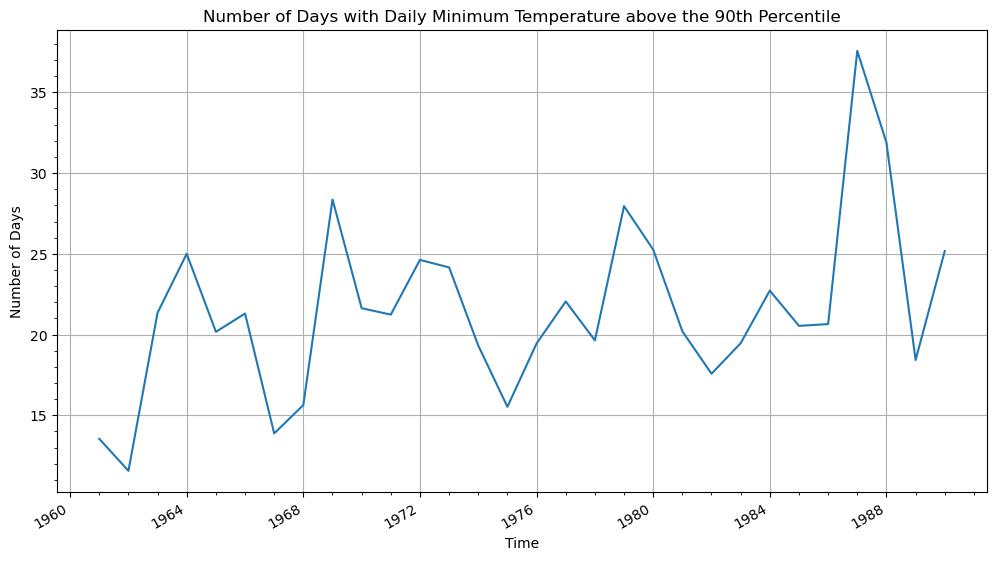

In [ ]:
warm_nights_mean = warm_nights.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Plotting the time series
plt.figure(figsize=(12, 6))
warm_nights_mean.plot()
plt.title('Number of Days with Daily Minimum Temperature above the 90th Percentile')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.grid(True)
plt.minorticks_on()
plt.show()


In [ ]:
from xclim.indices import warm_spell_duration_index


tasmax_per_90 = percentile_doy(data['t2m'], per=90, window=5).sel(percentiles=90)
warm_spell_index = warm_spell_duration_index(data['t2m'], tasmax_per_90)


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

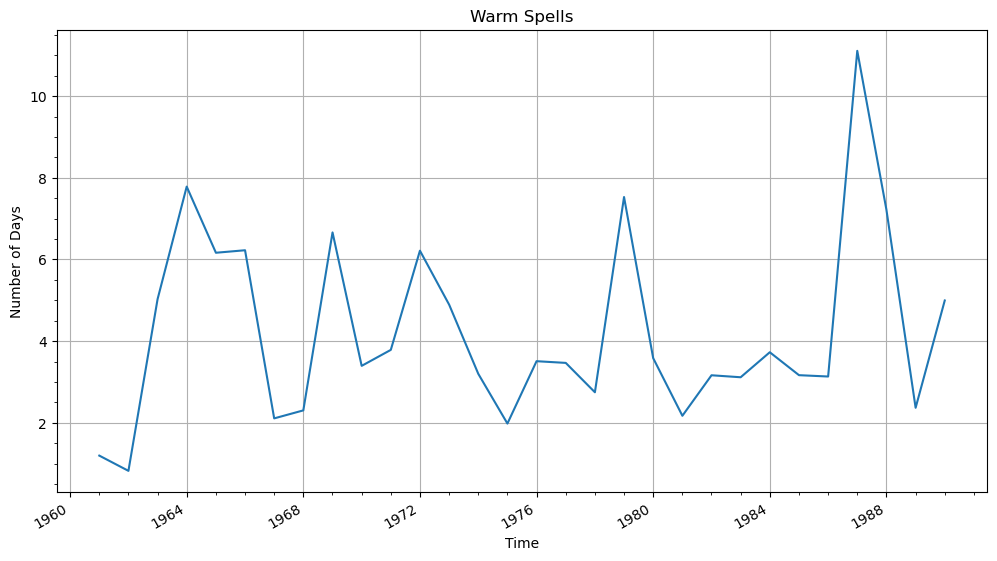

In [ ]:
warm_spell_index_mean = warm_spell_index.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Plotting the time series
plt.figure(figsize=(12, 6))
warm_spell_index_mean.plot()
plt.title('Warm Spells')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.grid(True)
plt.minorticks_on()
plt.show()


In [ ]:
from xclim.indices import cold_spell_duration_index


tasmin_per_10 = percentile_doy(data['t2m'], per=10, window=5).sel(percentiles=10)
cold_spell_index = cold_spell_duration_index(data['t2m'], tasmin_per_10)


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

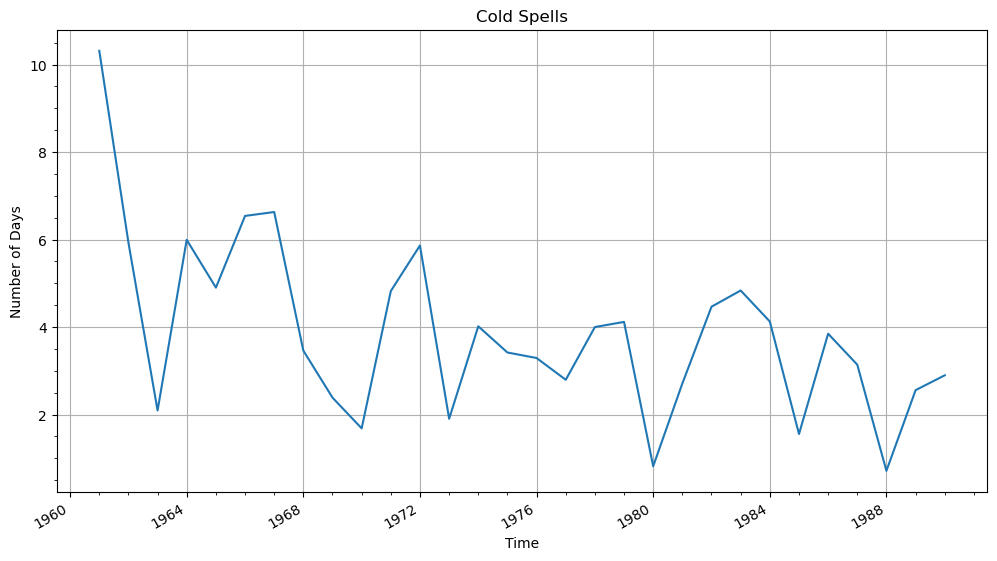

In [ ]:
cold_spell_index_mean = cold_spell_index.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Plotting the time series
plt.figure(figsize=(12, 6))
cold_spell_index_mean.plot()
plt.title('Cold Spells')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.grid(True)
plt.minorticks_on()
plt.show()


In [ ]:
from xclim.indices import frost_days


frost_days_index = frost_days(data['t2m'], thresh='273.15 K')


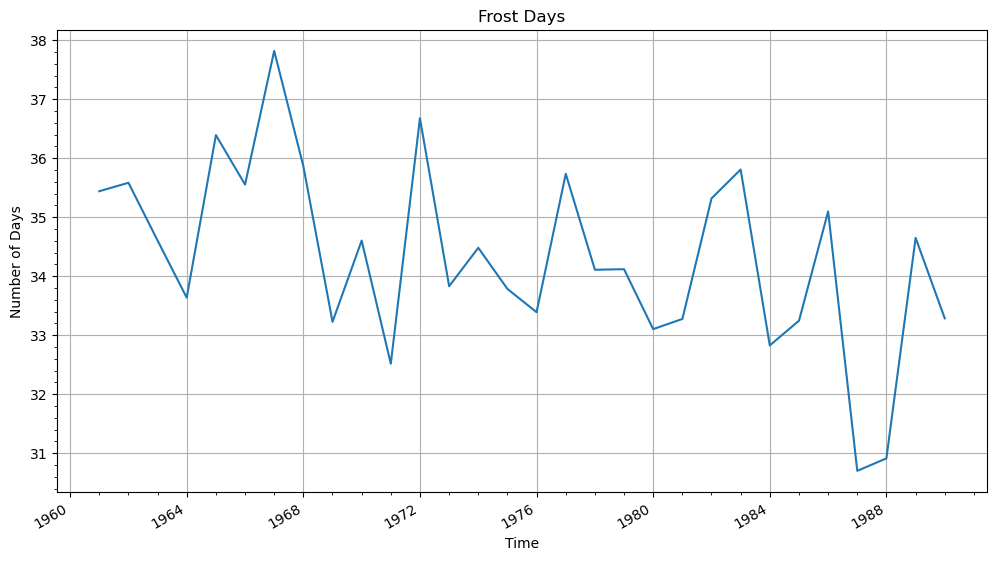

In [ ]:
frost_days_index_mean = frost_days_index.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Plotting the time series
plt.figure(figsize=(12, 6))
frost_days_index_mean.plot()
plt.title('Frost Days')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.grid(True)
plt.minorticks_on()
plt.show()


### Pre-Processing of the Data 

Lets try to write a function which will take care of all the pre-processing functions of the dataset input

In [ ]:
def pre_process(datafile, time_range=None, fill_missing=None, resample_freq=None, months=None, season=None, resample_method='mean'):
    try:
        print("Loading data...")
        # 1. Loading Data
        data = xr.open_dataset(datafile)
        print("Data loaded successfully.")

        # Check if the time dimension exists
        if 'time' not in data.dims:
            raise ValueError("Time dimension not found in the dataset.")
        print("Time axis found.")

        # 2. Time Selection
        if time_range:
            print(f"Selecting data within time range: {time_range[0]} to {time_range[1]}...")
            start_time, end_time = time_range
            data = data.sel(time=slice(start_time, end_time))
            print("Time selection completed.")

        # 3. Select specific months
        if months:
            print(f"Selecting data for specific months: {months}...")
            data = data.sel(time=data['time.month'].isin(months))
            print("Month selection completed.")

        # 4. Select specific season
        if season:
            print(f"Selecting data for specific season: {season}...")
            data = data.sel(time=data['time.season'] == season)
            print("Season selection completed.")

        # 5. Resample or aggregate data
        if resample_freq:
            print(f"Resampling data with frequency: {resample_freq}, using method: {resample_method}...")
            resampler = data.resample(time=resample_freq)
            if resample_method in dir(resampler):
                data = getattr(resampler, resample_method)()
            else:
                raise ValueError(f"Unknown resampling method: {resample_method}.")
            print("Resampling completed.")
        
        # 6. Handling Missing Values (NaN)
        if fill_missing:
            if isinstance(fill_missing, (int, float)):
                print(f"Filling missing values with specified value: {fill_missing}...")
                data = data.fillna(fill_missing)
            elif fill_missing == 'interpolate':
                print("Filling missing values using interpolation...")
                data = data.interpolate_na(dim='time', method='linear')
            else:
                print(f"Unknown method to fill missing values: {fill_missing}. Skipping this step.")
            print("Missing values handling completed.")

        return data

    except Exception as e:
        print(f"An error occurred while processing the data: {str(e)}")
        return data  # Return the modified dataset up to the point of failure


In [ ]:
filepath = '/home/posiden/Documents/Datasets/era5/india.1960.1990.nc'

test = pre_process(filepath)

Loading data...
Data loaded successfully.
Time axis found.


In [ ]:
test

<xarray.Dataset>
Dimensions:    (time: 10957, bnds: 2, longitude: 161, latitude: 141)
Coordinates:
  * time       (time) datetime64[ns] 1961-01-01T11:00:00 ... 1990-12-31T11:00:00
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 5.75 5.5 5.25 5.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Aug 10 10:42:11 2023: cdo sellonlatbox,60,100,5,40 land...
    frequency:    day
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [ ]:
import matplotlib.pyplot as plt

def plot_tx10p(data, title):
    # Take the mean along latitude and longitude
    data_mean = data.mean(dim=['latitude', 'longitude'])
    
    data_mean.plot(figsize=(10, 5))
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('tx10p Index')
    plt.grid(True)
    plt.show()

# Path to your data file
datafile = '/home/posiden/Documents/Datasets/era5/india.1960.1990.nc'

# Test for specific months (e.g., January, February, March)
processed_data_months = pre_process(datafile, months=[1, 2, 3])
tasmax_per_months = percentile_doy(processed_data_months['t2m'], per=10, window=5).sel(percentiles=10)
tx10p_months = tx10p(processed_data_months['t2m'], tasmax_per_months)
plot_tx10p(tx10p_months, "tx10p for Specific Months: January, February, March")

# Test for specific season (e.g., Summer: June, July, August)
processed_data_season = pre_process(datafile, season='JJA')
tasmax_per_season = percentile_doy(processed_data_season['t2m'], per=10, window=5).sel(percentiles=10)
tx10p_season = tx10p(processed_data_season['t2m'], tasmax_per_season)
plot_tx10p(tx10p_season, "tx10p for Specific Season: Summer (JJA)")


### Class Implementation 

Loading data...
Data loaded successfully.
Time axis found.


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

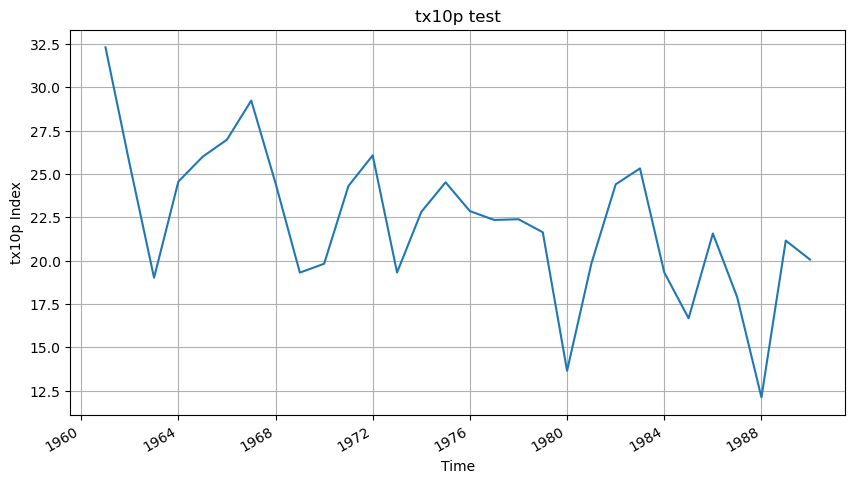

In [9]:
import xarray as xr
from xclim.indices import tx10p, tx90p, tn10p, tn90p, warm_spell_duration_index, cold_spell_duration_index, frost_days
from xclim.core.calendar import percentile_doy

class ClimateIndex:
    def __init__(self, datafile):
        self.datafile = datafile
        self.data = None

    def pre_process(self, time_range=None, fill_missing=None, resample_freq=None, months=None, season=None, resample_method='mean'):
        try:
            print("Loading data...")
            # 1. Loading Data
            self.data = xr.open_dataset(self.datafile)
            print("Data loaded successfully.")

            # Check if the time dimension exists
            if 'time' not in self.data.dims:
                raise ValueError("Time dimension not found in the dataset.")
            print("Time axis found.")

            # 2. Time Selection
            if time_range:
                print(f"Selecting data within time range: {time_range[0]} to {time_range[1]}...")
                start_time, end_time = time_range
                self.data = self.data.sel(time=slice(start_time, end_time))
                print("Time selection completed.")

            # 3. Select specific months
            if months:
                print(f"Selecting data for specific months: {months}...")
                self.data = self.data.sel(time=self.data['time.month'].isin(months))
                print("Month selection completed.")

            # 4. Select specific season
            if season:
                print(f"Selecting data for specific season: {season}...")
                self.data = self.data.sel(time=self.data['time.season'] == season)
                print("Season selection completed.")

            # 5. Resample or aggregate data
            if resample_freq:
                print(f"Resampling data with frequency: {resample_freq}, using method: {resample_method}...")
                resampler = self.data.resample(time=resample_freq)
                if resample_method in dir(resampler):
                    self.data = getattr(resampler, resample_method)()
                else:
                    raise ValueError(f"Unknown resampling method: {resample_method}.")
                print("Resampling completed.")
            
            # 6. Handling Missing Values (NaN)
            if fill_missing:
                if isinstance(fill_missing, (int, float)):
                    print(f"Filling missing values with specified value: {fill_missing}...")
                    data = data.fillna(fill_missing)
                elif fill_missing == 'interpolate':
                    print("Filling missing values using interpolation...")
                    data = data.interpolate_na(dim='time', method='linear')
                else:
                    print(f"Unknown method to fill missing values: {fill_missing}. Skipping this step.")
                print("Missing values handling completed.")

        except Exception as e:
            print(f"An error occurred while processing the data: {str(e)}")
            # Return the modified dataset up to the point of failure (already updated in self.data)

    def calculate_tx10p(self):
        tasmax_per = percentile_doy(self.data['t2m'], per=10, window=5).sel(percentiles=10)
        return tx10p(self.data['t2m'], tasmax_per)

    def calculate_tx90p(self):
        tasmax_per = percentile_doy(self.data['t2m'], per=90, window=5).sel(percentiles=90)
        return tx90p(self.data['t2m'], tasmax_per)

    def calculate_tn10p(self):
        tasmin_per = percentile_doy(self.data['t2m'], per=10, window=5).sel(percentiles=10)
        return tn10p(self.data['t2m'], tasmin_per)

    def calculate_tn90p(self):
        tasmin_per = percentile_doy(self.data['t2m'], per=90, window=5).sel(percentiles=90)
        return tn90p(self.data['t2m'], tasmin_per)

    def calculate_frost_days(self):
        return frost_days(self.data['t2m'], thresh='273.15 K')

    def calculate_warm_spell(self):
        tasmax_per = percentile_doy(self.data['t2m'], per=90, window=5).sel(percentiles=90)
        return warm_spell_duration_index(self.data['t2m'], tasmax_per)

    def calculate_cold_spell(self):
        tasmin_per = percentile_doy(self.data['t2m'], per=10, window=5).sel(percentiles=10)
        return cold_spell_duration_index(self.data['t2m'], tasmin_per)


# Example usage:
climate_index = ClimateIndex(datafile='/home/posiden/Documents/Datasets/era5/india.1960.1990.nc')
climate_index.pre_process()
tx10p_index = climate_index.calculate_tx10p()

def plot_tx10p(data, title):
    # Take the mean along latitude and longitude
    data_mean = data.mean(dim=['latitude', 'longitude'])
    
    data_mean.plot(figsize=(10, 5))
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('tx10p Index')
    plt.grid(True)
    plt.show()

plot_tx10p(tx10p_index, "tx10p test")

#### Adding the precipitation climate indices to the code 

In [11]:
import xarray as xr
from xclim.core.calendar import percentile_doy

# Open the precipitation dataset
pr = xr.open_dataset('/home/posiden/Documents/Datasets/era5/india.tp.1960.1990.nc')['tp']

In [12]:
pr

<xarray.DataArray 'tp' (time: 30316, latitude: 129, longitude: 201)>
[786063564 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1940-01-01T15:00:00 ... 2022-12-31T11:30:00
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 109.5 109.8 110.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 8.75 8.5 8.25 8.0
Attributes:
    long_name:     Total precipitation
    units:         m
    cell_methods:  time: sum

In [34]:
import xarray as xr
import numpy as np

# Open the precipitation dataset
pr = xr.open_dataset('/home/posiden/Documents/Datasets/era5/india.tp.1960.1990.nc')['tp']

# Exclude leap day (February 29th) if present
pr = pr.where((pr['time.month'] != 2) | (pr['time.day'] != 29), drop=True)

# Define wet day threshold in millimeters
wet_day_thresh_mm = 1.0

# Convert the threshold to meters
wet_day_thresh_meters = wet_day_thresh_mm / 1000.0

# Calculate the 95th percentile for the reference period (e.g., 1961-1990)
reference_period = pr.sel(time=slice('1961-01-01', '1990-12-31'))
wet_days_reference = reference_period.where(reference_period >= wet_day_thresh_meters)
p95_reference = wet_days_reference.groupby('time.dayofyear').reduce(np.nanpercentile, q=95, dim='time')

# Identify wet days
wet_days = pr.where(pr >= wet_day_thresh_meters)

# Compare each day with the corresponding percentile
exceeding_days = wet_days.groupby('time.dayofyear') > p95_reference

# Sum the precipitation for those days (r95p index)
r95p_index_time_series = (exceeding_days * pr).sum(dim=['latitude', 'longitude']).resample(time='Y').sum()

# This will give you a time series of the R95p index
print(r95p_index_time_series)





/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/na

<xarray.DataArray 'tp' (time: 83)>
array([5833.6074, 5759.2524, 5832.7188, 6494.1206, 6440.3076, 5772.3203,
       7318.976 , 5529.348 , 6215.423 , 7015.5273, 6956.2344, 6685.801 ,
       7069.6055, 7519.4062, 6421.999 , 6522.053 , 7213.692 , 6957.217 ,
       7615.8154, 7597.4424, 6733.8555, 6473.2856, 5711.1895, 5848.332 ,
       6420.326 , 5977.493 , 6028.235 , 6108.2666, 5785.5137, 5686.1104,
       4597.0405, 4439.096 , 4565.6255, 5701.1626, 4651.7676, 4504.424 ,
       4499.5874, 4293.6646, 5053.4917, 5766.2227, 4993.686 , 5015.5244,
       4987.5874, 6367.217 , 5503.7017, 5124.299 , 5108.6016, 5461.966 ,
       5328.246 , 5113.58  , 4996.259 , 5830.415 , 6558.163 , 6906.4033,
       5816.5884, 7218.743 , 6334.341 , 6550.215 , 7623.957 , 5905.783 ,
       5059.743 , 5556.7305, 6225.0747, 5735.426 , 6168.7812, 7138.506 ,
       5883.5317, 6065.459 , 6546.877 , 5905.8823, 6959.7363, 5716.47  ,
       5689.373 , 6672.415 , 5951.791 , 7061.704 , 6304.9033, 7233.3013,
       7085.116 

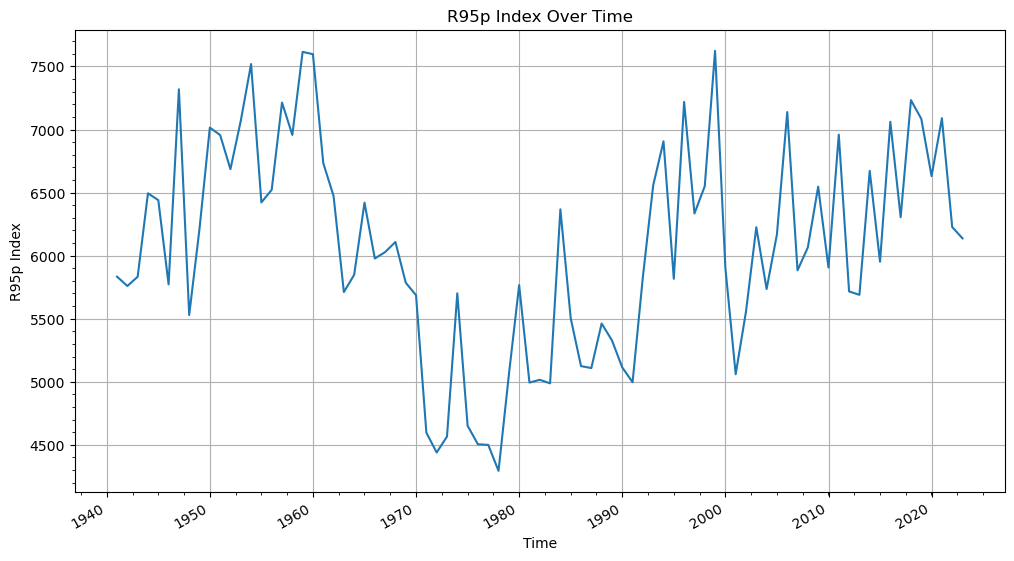

In [35]:
# # Plotting the time series
plt.figure(figsize=(12, 6))
r95p_index_time_series.plot()
plt.title('R95p Index Over Time')
plt.xlabel('Time')
plt.ylabel('R95p Index')
plt.grid(True)
plt.minorticks_on()
plt.show()


In [36]:
print(reference_period['time'].min().values)
print(reference_period['time'].max().values)


1961-01-01T11:00:00.000000000
1990-12-31T11:30:00.000000000


R95p calculator function to be included in the class impelementation of the rest of the indices 

In [1]:
import xarray as xr
import numpy as np

def calculate_r95p(pr_dataset, wet_day_thresh_mm=1.0, reference_period=('1961-01-01', '1990-12-31'), resample_freq='Y'):
    # Exclude leap day (February 29th) if present
    pr = pr_dataset.where((pr_dataset['time.month'] != 2) | (pr_dataset['time.day'] != 29), drop=True)

    # Convert the wet day threshold to meters
    wet_day_thresh_meters = wet_day_thresh_mm / 1000.0

    # Calculate the 95th percentile for the reference period
    reference_period_data = pr.sel(time=slice(*reference_period))
    wet_days_reference = reference_period_data.where(reference_period_data >= wet_day_thresh_meters)
    p95_reference = wet_days_reference.groupby('time.dayofyear').reduce(np.nanpercentile, q=95, dim='time')

    # Identify wet days
    wet_days = pr.where(pr >= wet_day_thresh_meters)

    # Compare each day with the corresponding percentile
    exceeding_days = wet_days.groupby('time.dayofyear') > p95_reference

    # Sum the precipitation for those days (r95p index)
    r95p_index_time_series = (exceeding_days * pr).mean(dim=['latitude', 'longitude']).resample(time=resample_freq).sum() * 1000

    # Count the number of days exceeding the 95th percentile
    r95p_days_count = exceeding_days.resample(time=resample_freq).sum(dim='time')

    return r95p_index_time_series * 1000, r95p_days_count


/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/na

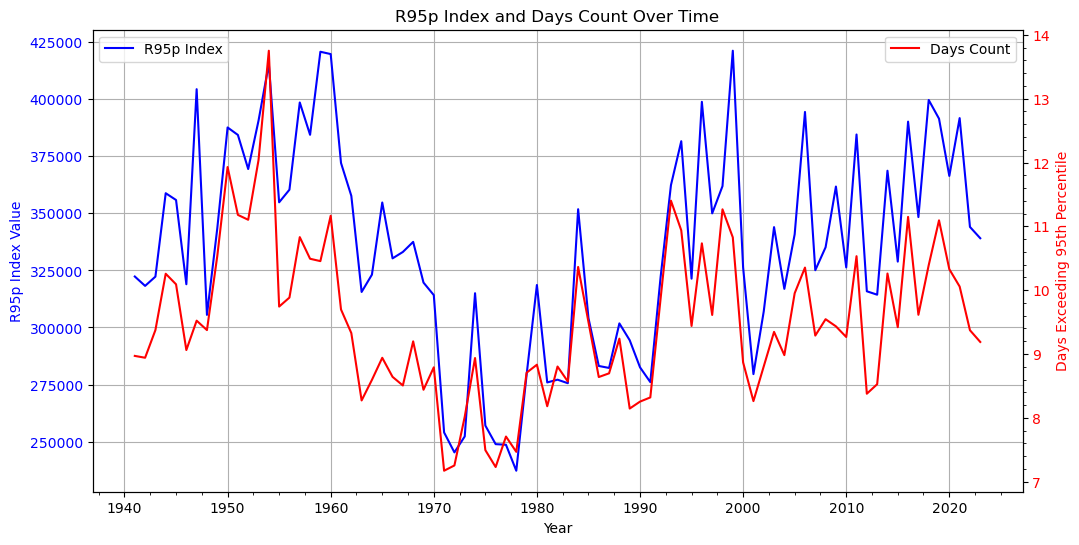

In [3]:
import matplotlib.pyplot as plt

def test_calculate_r95p():
    pr = xr.open_dataset('/home/posiden/Documents/Datasets/era5/india.tp.1960.1990.nc')['tp']
    r95p_index, r95p_days_count = calculate_r95p(pr)

    # Plot the R95p index time series
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.plot(r95p_index['time'], r95p_index, 'b-', label="R95p Index")
    ax1.set_title('R95p Index and Days Count Over Time')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('R95p Index Value', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    ax2 = ax1.twinx()
    # Take the mean over latitude and longitude for plotting
    r95p_days_count_mean = r95p_days_count.mean(dim=['latitude', 'longitude'])
    ax2.plot(r95p_days_count['time'], r95p_days_count_mean, 'r-', label="Days Count")
    ax2.set_ylabel('Days Exceeding 95th Percentile', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.legend(loc='upper right')

    plt.minorticks_on()
    plt.show()

test_calculate_r95p()

RX5day calculations 

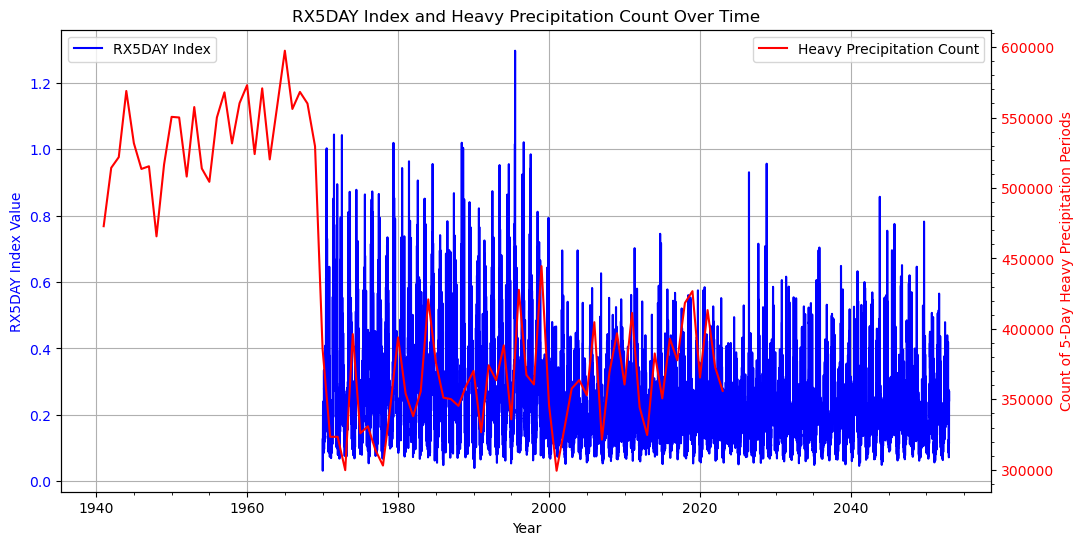

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

def calculate_rx5day(pr_dataset, threshold_mm=50.0, resample_freq='Y'):
    # Calculate the rolling 5-day precipitation total
    rolling_5day_total = pr_dataset.rolling(time=5).sum()

    # Find the maximum 5-day total for each time period (e.g., year)
    rx5day_index = rolling_5day_total.resample(time=resample_freq).max(dim=['latitude', 'longitude'])

    # Count the number of 5-day heavy precipitation periods
    heavy_precip_periods = rolling_5day_total.where(rolling_5day_total >= threshold_mm / 1000.0)
    heavy_precip_count = heavy_precip_periods.resample(time=resample_freq).count(dim=['time', 'latitude', 'longitude'])

    return rx5day_index, heavy_precip_count


def test_calculate_rx5day():
    pr = xr.open_dataset('/home/posiden/Documents/Datasets/era5/india.tp.1960.1990.nc')['tp']
    rx5day_index, heavy_precip_count = calculate_rx5day(pr)

    # Plot the RX5DAY index time series
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.plot(rx5day_index['time'], rx5day_index, 'b-', label="RX5DAY Index")
    ax1.set_title('RX5DAY Index and Heavy Precipitation Count Over Time')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('RX5DAY Index Value', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    ax2 = ax1.twinx()
    ax2.plot(heavy_precip_count['time'], heavy_precip_count, 'r-', label="Heavy Precipitation Count")
    ax2.set_ylabel('Count of 5-Day Heavy Precipitation Periods', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.legend(loc='upper right')

    plt.minorticks_on()
    plt.show()

test_calculate_rx5day()


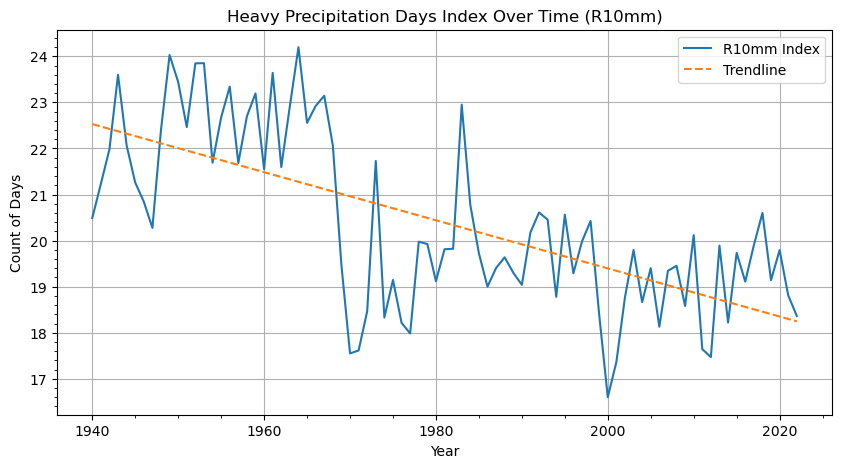

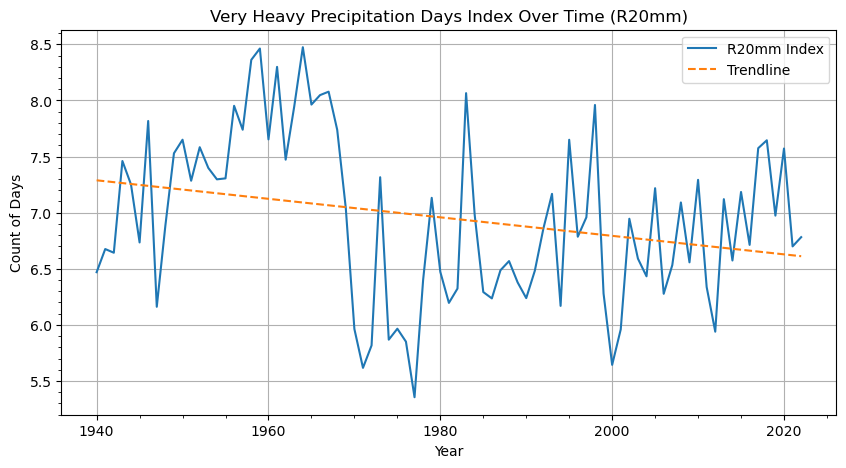

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

def calculate_precip_days(pr_dataset, threshold_mm=10.0):
    # Convert the threshold to meters
    threshold_meters = threshold_mm / 1000.0

    # Identify days with precipitation exceeding the threshold
    heavy_precip_days = pr_dataset.where(pr_dataset >= threshold_meters)

    # Count the number of days exceeding the threshold per year
    precip_days_index = heavy_precip_days.groupby('time.year').count(dim='time')

    return precip_days_index.mean(dim=['latitude', 'longitude'])

def plot_index_with_trend(index, label):
    # Plot the index
    index.plot(label=label)
    
    # Fit a linear trendline
    x = np.arange(len(index))
    y = index.values
    z = np.polyfit(x, y, 1)
    trendline = np.poly1d(z)
    plt.plot(index['year'], trendline(x), linestyle='--', label="Trendline")

def test_calculate_precip_days():
    pr = xr.open_dataset('/home/posiden/Documents/Datasets/era5/india.tp.1960.1990.nc')['tp']
    
    # Calculate for 10mm
    r10mm_index = calculate_precip_days(pr, threshold_mm=10.0)
    
    # Plotting R10mm index with trendline
    plt.figure(figsize=(10, 5))
    plot_index_with_trend(r10mm_index, label="R10mm Index")
    plt.title('Heavy Precipitation Days Index Over Time (R10mm)')
    plt.xlabel('Year')
    plt.ylabel('Count of Days')
    plt.legend()
    plt.grid(True)
    plt.minorticks_on()
    plt.show()

    # Calculate for 20mm
    r20mm_index = calculate_precip_days(pr, threshold_mm=20.0)

    # Plotting R20mm index with trendline
    plt.figure(figsize=(10, 5))
    plot_index_with_trend(r20mm_index, label="R20mm Index")
    plt.title('Very Heavy Precipitation Days Index Over Time (R20mm)')
    plt.xlabel('Year')
    plt.ylabel('Count of Days')
    plt.legend()
    plt.grid(True)
    plt.minorticks_on()
    plt.show()

test_calculate_precip_days()


### Final Class Implementation of the index calculator

Loading data...
Data loaded successfully.
Time axis found.


/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/na

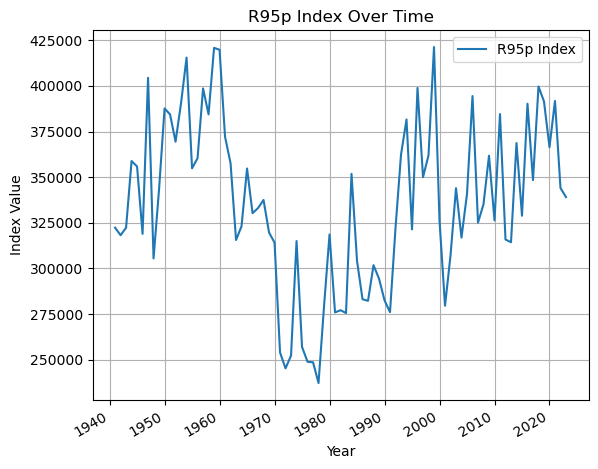

/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/na

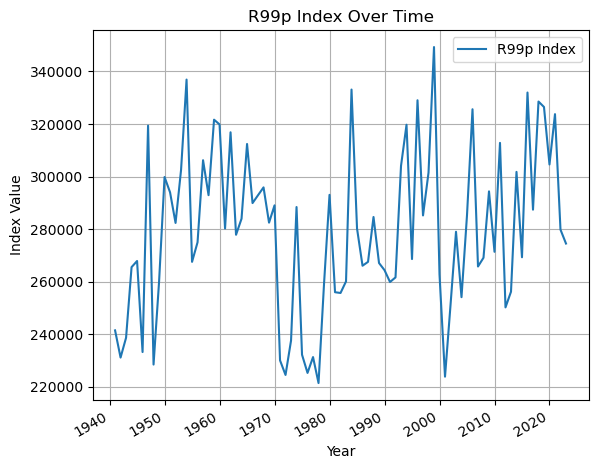

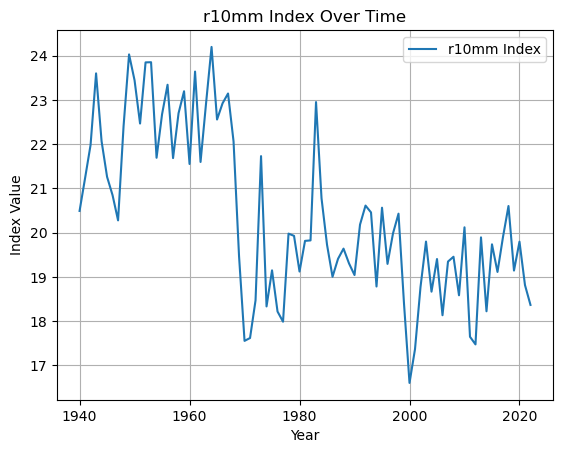

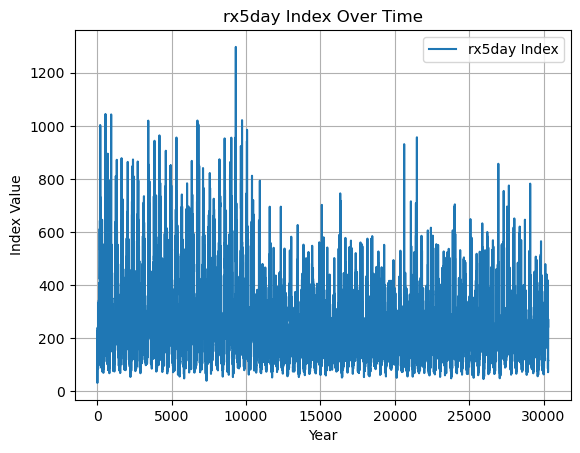

In [15]:
import xarray as xr
from xclim.indices import tx10p, tx90p, tn10p, tn90p, warm_spell_duration_index, cold_spell_duration_index, frost_days
from xclim.core.calendar import percentile_doy

class ClimateIndex:
    def __init__(self, datafile):
        self.datafile = datafile
        self.data = None

    def pre_process(self, time_range=None, fill_missing=None, resample_freq=None, months=None, season=None, resample_method='mean'):
        try:
            print("Loading data...")
            # 1. Loading Data
            self.data = xr.open_dataset(self.datafile)
            print("Data loaded successfully.")

            # Check if the time dimension exists
            if 'time' not in self.data.dims:
                raise ValueError("Time dimension not found in the dataset.")
            print("Time axis found.")

            # 2. Time Selection
            if time_range:
                print(f"Selecting data within time range: {time_range[0]} to {time_range[1]}...")
                start_time, end_time = time_range
                self.data = self.data.sel(time=slice(start_time, end_time))
                print("Time selection completed.")

            # 3. Select specific months
            if months:
                print(f"Selecting data for specific months: {months}...")
                self.data = self.data.sel(time=self.data['time.month'].isin(months))
                print("Month selection completed.")

            # 4. Select specific season
            if season:
                print(f"Selecting data for specific season: {season}...")
                self.data = self.data.sel(time=self.data['time.season'] == season)
                print("Season selection completed.")

            # 5. Resample or aggregate data
            if resample_freq:
                print(f"Resampling data with frequency: {resample_freq}, using method: {resample_method}...")
                resampler = self.data.resample(time=resample_freq)
                if resample_method in dir(resampler):
                    self.data = getattr(resampler, resample_method)()
                else:
                    raise ValueError(f"Unknown resampling method: {resample_method}.")
                print("Resampling completed.")
            
            # 6. Handling Missing Values (NaN)
            if fill_missing:
                if isinstance(fill_missing, (int, float)):
                    print(f"Filling missing values with specified value: {fill_missing}...")
                    data = data.fillna(fill_missing)
                elif fill_missing == 'interpolate':
                    print("Filling missing values using interpolation...")
                    data = data.interpolate_na(dim='time', method='linear')
                else:
                    print(f"Unknown method to fill missing values: {fill_missing}. Skipping this step.")
                print("Missing values handling completed.")

        except Exception as e:
            print(f"An error occurred while processing the data: {str(e)}")
            # Return the modified dataset up to the point of failure (already updated in self.data)

    def calculate_tx10p(self):
        tasmax_per = percentile_doy(self.data['t2m'], per=10, window=5).sel(percentiles=10)
        return tx10p(self.data['t2m'], tasmax_per)

    def calculate_tx90p(self):
        tasmax_per = percentile_doy(self.data['t2m'], per=90, window=5).sel(percentiles=90)
        return tx90p(self.data['t2m'], tasmax_per)

    def calculate_tn10p(self):
        tasmin_per = percentile_doy(self.data['t2m'], per=10, window=5).sel(percentiles=10)
        return tn10p(self.data['t2m'], tasmin_per)

    def calculate_tn90p(self):
        tasmin_per = percentile_doy(self.data['t2m'], per=90, window=5).sel(percentiles=90)
        return tn90p(self.data['t2m'], tasmin_per)

    def calculate_frost_days(self):
        return frost_days(self.data['t2m'], thresh='273.15 K')

    def calculate_warm_spell(self):
        tasmax_per = percentile_doy(self.data['t2m'], per=90, window=5).sel(percentiles=90)
        return warm_spell_duration_index(self.data['t2m'], tasmax_per)

    def calculate_cold_spell(self):
        tasmin_per = percentile_doy(self.data['t2m'], per=10, window=5).sel(percentiles=10)
        return cold_spell_duration_index(self.data['t2m'], tasmin_per)
    
    def calculate_percentile_p(self, percentile=95, wet_day_thresh_mm=1.0, reference_period=('1961-01-01', '1990-12-31'), resample_freq='Y'):
        pr = self.data['tp'] # Assuming the precipitation data is stored in the 'tp' variable
        # Exclude leap day (February 29th) if present
        pr = pr.where((pr['time.month'] != 2) | (pr['time.day'] != 29), drop=True)

        # Convert the wet day threshold to meters
        wet_day_thresh_meters = wet_day_thresh_mm / 1000.0

        # Calculate the specified percentile for the reference period
        reference_period_data = pr.sel(time=slice(*reference_period))
        wet_days_reference = reference_period_data.where(reference_period_data >= wet_day_thresh_meters)
        p_reference = wet_days_reference.groupby('time.dayofyear').reduce(np.nanpercentile, q=percentile, dim='time')

        # Identify wet days
        wet_days = pr.where(pr >= wet_day_thresh_meters)

        # Compare each day with the corresponding percentile
        exceeding_days = wet_days.groupby('time.dayofyear') > p_reference

        # Sum the precipitation for those days (rXXp index)
        rXXp_index_time_series = (exceeding_days * pr).mean(dim=['latitude', 'longitude']).resample(time=resample_freq).sum() * 1000

        # Count the number of days exceeding the specified percentile
        rXXp_days_count = exceeding_days.resample(time=resample_freq).sum(dim='time')

        return rXXp_index_time_series * 1000, rXXp_days_count
    
    def calculate_rxnday(self, n_days=5, threshold_mm=50.0, resample_freq='Y'):
        pr = self.data['tp'] # Assuming the precipitation data is stored in the 'tp' variable

        # Calculate the rolling n-day precipitation total
        rolling_nday_total = pr.rolling(time=n_days).sum()

        # Find the maximum n-day total for each time period (e.g., year)
        rxnday_index = rolling_nday_total.resample(time=resample_freq).max(dim=['latitude', 'longitude'])

        # Count the number of n-day heavy precipitation periods
        heavy_precip_periods = rolling_nday_total.where(rolling_nday_total >= threshold_mm / 1000.0)
        heavy_precip_count = heavy_precip_periods.resample(time=resample_freq).count(dim=['time', 'latitude', 'longitude'])

        return rxnday_index * 1000, heavy_precip_count
    
    def calculate_precip_days(self, threshold_mm=10.0):
        # Convert the threshold to meters
        threshold_meters = threshold_mm / 1000.0

        # Identify days with precipitation exceeding the threshold
        heavy_precip_days = self.data['tp'].where(self.data['tp'] >= threshold_meters)

        # Count the number of days exceeding the threshold per year
        precip_days_index = heavy_precip_days.groupby('time.year').count(dim='time')

        return precip_days_index.mean(dim=['latitude', 'longitude'])

    
    


# # Example usage:
# climate_index = ClimateIndex(datafile='/home/posiden/Documents/Datasets/era5/india.1960.1990.nc')
# climate_index.pre_process()
# tx10p_index = climate_index.calculate_tx10p()

# def plot_tx10p(data, title):
#     # Take the mean along latitude and longitude
#     data_mean = data.mean(dim=['latitude', 'longitude'])
    
#     data_mean.plot(figsize=(10, 5))
#     plt.title(title)
#     plt.xlabel('Time')
#     plt.ylabel('tx10p Index')
#     plt.grid(True)
#     plt.show()

def test_calculate_precip_days_and_percentiles():
    climate_index = ClimateIndex(datafile='/home/posiden/Documents/Datasets/era5/india.tp.1960.1990.nc')
    climate_index.pre_process()

    # Calculate R95p and plot
    r95p_index_time_series, _ = climate_index.calculate_percentile_p(percentile=95)
    r95p_index_time_series.plot(label="R95p Index")
    plt.title('R95p Index Over Time')
    plt.xlabel('Year')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate R99p and plot
    r99p_index_time_series, _ = climate_index.calculate_percentile_p(percentile=99)
    r99p_index_time_series.plot(label="R99p Index")
    plt.title('R99p Index Over Time')
    plt.xlabel('Year')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate r10mm and plot
    r10mm_index = climate_index.calculate_precip_days(threshold_mm=10.0)
    r10mm_index.plot(label="r10mm Index")
    plt.title('r10mm Index Over Time')
    plt.xlabel('Year')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate rx5day and plot
    rx5day_index, _ = climate_index.calculate_rxnday(n_days=5)
    rx5day_index.plot(label="rx5day Index")
    plt.title('rx5day Index Over Time')
    plt.xlabel('Year')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Add any other precipitation-related calculations and plots here

# Run the test
test_calculate_precip_days_and_percentiles()


In [19]:
import xarray as xr
from xclim.indices import tx10p, tx90p, tn10p, tn90p, warm_spell_duration_index, cold_spell_duration_index, frost_days
from xclim.core.calendar import percentile_doy

class ClimateIndex:
    def __init__(self, datafile):
        self.datafile = datafile
        self.data = None

    def pre_process(self, time_range=None, fill_missing=None, resample_freq=None, months=None, season=None, resample_method='mean'):
        try:
            print("Loading data...")
            self.data = xr.open_dataset(self.datafile)
            print("Data loaded successfully.")
            if 'time' not in self.data.dims:
                raise ValueError("Time dimension not found in the dataset.")
            print("Time axis found.")
            if time_range:
                start_time, end_time = time_range
                self.data = self.data.sel(time=slice(start_time, end_time))
                print("Time selection completed.")
            if months:
                self.data = self.data.sel(time=self.data['time.month'].isin(months))
                print("Month selection completed.")
            if season:
                self.data = self.data.sel(time=self.data['time.season'] == season)
                print("Season selection completed.")
            if resample_freq:
                resampler = self.data.resample(time=resample_freq)
                if resample_method in dir(resampler):
                    self.data = getattr(resampler, resample_method)()
                else:
                    raise ValueError(f"Unknown resampling method: {resample_method}.")
                print("Resampling completed.")
            if fill_missing:
                if isinstance(fill_missing, (int, float)):
                    print(f"Filling missing values with specified value: {fill_missing}...")
                    self.data = self.data.fillna(fill_missing)
                elif fill_missing == 'interpolate':
                    print("Filling missing values using interpolation...")
                    self.data = self.data.interpolate_na(dim='time', method='linear')
                else:
                    print(f"Unknown method to fill missing values: {fill_missing}. Skipping this step.")
                print("Missing values handling completed.")
        except Exception as e:
            print(f"An error occurred while processing the data: {str(e)}")

    def calculate_tx10p(self, temp_var='t2m'):
        tasmax_per = percentile_doy(self.data[temp_var], per=10, window=5).sel(percentiles=10)
        return tx10p(self.data[temp_var], tasmax_per)

    def calculate_tx90p(self, temp_var='t2m'):
        tasmax_per = percentile_doy(self.data[temp_var], per=90, window=5).sel(percentiles=90)
        return tx90p(self.data[temp_var], tasmax_per)

    def calculate_tn10p(self, temp_var='t2m'):
        tasmin_per = percentile_doy(self.data[temp_var], per=10, window=5).sel(percentiles=10)
        return tn10p(self.data[temp_var], tasmin_per)

    def calculate_tn90p(self, temp_var='t2m'):
        tasmin_per = percentile_doy(self.data[temp_var], per=90, window=5).sel(percentiles=90)
        return tn90p(self.data[temp_var], tasmin_per)

    def calculate_frost_days(self, temp_var='t2m'):
        return frost_days(self.data[temp_var], thresh='273.15 K')

    def calculate_warm_spell(self, temp_var='t2m'):
        tasmax_per = percentile_doy(self.data[temp_var], per=90, window=5).sel(percentiles=90)
        return warm_spell_duration_index(self.data[temp_var], tasmax_per)

    def calculate_cold_spell(self, temp_var='t2m'):
        tasmin_per = percentile_doy(self.data[temp_var], per=10, window=5).sel(percentiles=10)
        return cold_spell_duration_index(self.data[temp_var], tasmin_per)
    

    def calculate_percentile_p(self, precip_var='tp', percentile=95, wet_day_thresh_mm=1.0, reference_period=('1961-01-01', '1990-12-31'), resample_freq='Y'):
        pr = self.data[precip_var] # Use the user-specified variable name
        # Exclude leap day (February 29th) if present
        pr = pr.where((pr['time.month'] != 2) | (pr['time.day'] != 29), drop=True)

        # Convert the wet day threshold to meters
        wet_day_thresh_meters = wet_day_thresh_mm / 1000.0

        # Calculate the specified percentile for the reference period
        reference_period_data = pr.sel(time=slice(*reference_period))
        wet_days_reference = reference_period_data.where(reference_period_data >= wet_day_thresh_meters)
        p_reference = wet_days_reference.groupby('time.dayofyear').reduce(np.nanpercentile, q=percentile, dim='time')

        # Identify wet days
        wet_days = pr.where(pr >= wet_day_thresh_meters)

        # Compare each day with the corresponding percentile
        exceeding_days = wet_days.groupby('time.dayofyear') > p_reference

        # Sum the precipitation for those days (rXXp index)
        rXXp_index_time_series = (exceeding_days * pr).resample(time=resample_freq).sum()

        # Count the number of days exceeding the specified percentile
        rXXp_days_count = exceeding_days.resample(time=resample_freq).sum(dim='time')

        return rXXp_index_time_series * 1000, rXXp_days_count



    def calculate_precip_days(self, precip_var='tp', threshold_mm=10.0):
        # Convert the threshold to meters
        threshold_meters = threshold_mm / 1000.0

        # Identify days with precipitation exceeding the threshold
        heavy_precip_days = self.data['tp'].where(self.data['tp'] >= threshold_meters)

        # Count the number of days exceeding the threshold per year
        precip_days_index = heavy_precip_days.groupby('time.year').count(dim='time')

        return precip_days_index
    
    def calculate_rxnday(self, precip_var='tp', n_days=5, threshold_mm=50.0, resample_freq='Y'):
        pr = self.data[precip_var]  # Use the user-specified variable name

        # Calculate the rolling n-day precipitation total
        rolling_nday_total = pr.rolling(time=n_days).sum()

        # Find the maximum n-day total for each time period (e.g., year)
        rxnday_index = rolling_nday_total.resample(time=resample_freq).max()

        # Count the number of n-day heavy precipitation periods
        heavy_precip_periods = rolling_nday_total.where(rolling_nday_total >= threshold_mm / 1000.0)
        heavy_precip_count = heavy_precip_periods.resample(time=resample_freq).count(dim='time')

        return rxnday_index * 1000, heavy_precip_count
    
    def test_indices(self, data_type='temperature'):
            # Methods to test for temperature data
        temp_methods_to_test = [
            self.calculate_tx10p,
            self.calculate_tx90p,
            self.calculate_tn10p,
            self.calculate_tn90p,
            self.calculate_frost_days,
            self.calculate_warm_spell,
            self.calculate_cold_spell,
        ]

        # Methods to test for precipitation data
        precip_methods_to_test = [
            self.calculate_percentile_p,
            self.calculate_precip_days,
            self.calculate_rxnday
        ]

    #    Choose the methods to test based on the data type
        if data_type == 'temperature':
            methods_to_test = temp_methods_to_test
        elif data_type == 'precipitation':
            methods_to_test = precip_methods_to_test
        else:
            raise ValueError("Invalid data type. Choose 'temperature' or 'precipitation'.")

        # Iterate through the methods and plot the results
        for method in methods_to_test:
            try:
                print(f"Testing {method.__name__}...")
                result = method()
                if isinstance(result, tuple):  # Handle methods that return multiple results
                    result = result[0]
                time_series = result.mean(dim=['latitude', 'longitude'])
                time_series.plot(label=method.__name__)
            except Exception as e:
                print(f"An error occurred while testing {method.__name__}: {str(e)}")
                continue

        plt.legend()
        plt.show()



Loading data...
Data loaded successfully.
Time axis found.
Loading data...
Data loaded successfully.
Time axis found.
Testing calculate_tx10p...


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

Testing calculate_tx90p...


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

Testing calculate_tn10p...


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

Testing calculate_tn90p...


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

Testing calculate_frost_days...
Testing calculate_warm_spell...


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

Testing calculate_cold_spell...


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

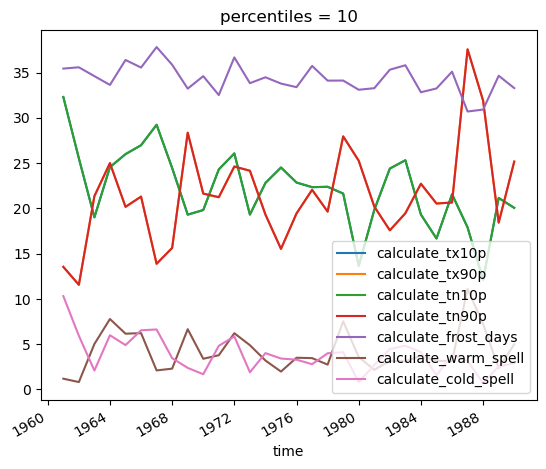

Testing calculate_percentile_p...


/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/posiden/anaconda3/lib/python3.11/site-packages/numpy/lib/na

Testing calculate_precip_days...
Testing calculate_rxnday...


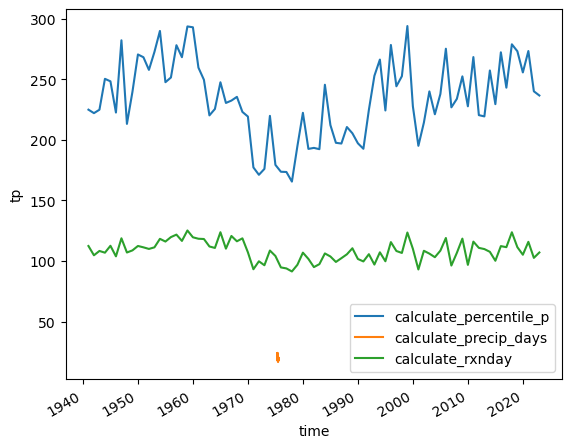

In [20]:
# Paths to your NetCDF data files
temp_datafile_path = '/home/posiden/Documents/Datasets/era5/india.1960.1990.nc'
precip_datafile_path = '/home/posiden/Documents/Datasets/era5/india.tp.1960.1990.nc'

# Create instances of the ClimateIndex class for temperature and precipitation
temp_climate_index = ClimateIndex(temp_datafile_path)
precip_climate_index = ClimateIndex(precip_datafile_path)

# # Preprocessing parameters for temperature
# temp_time_range = ('2000-01-01', '2010-12-31') # Example time range
# temp_fill_missing = 'interpolate' # Example fill_missing method
# temp_resample_freq = 'M' # Example resampling frequency

# # Preprocessing parameters for precipitation
# precip_time_range = ('2000-01-01', '2010-12-31') # Example time range
# precip_fill_missing = 'interpolate' # Example fill_missing method
# precip_resample_freq = 'M' # Example resampling frequency

# Apply preprocessing to temperature data
temp_climate_index.pre_process()

# Apply preprocessing to precipitation data
precip_climate_index.pre_process()


# Test and plot temperature-related indices
temp_climate_index.test_indices(data_type='temperature')

# Test and plot precipitation-related indices
precip_climate_index.test_indices(data_type='precipitation')



